# Simple XY plot for Time evolution of picked mode

This notebook generates time evolution plot of spectr data. The imput date is  [picked sph prefix] l[degree#] m[order#][c/s].dat.

## Initial setup

In [1]:
import sys
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from ctypes import *

Move current directory to directory with data to be averaged

In [2]:
%cd ./

/Volumes/Sources/matsui/Kemorin_MHD/MHD/pythons


Check if shared libraly to load is there

In [3]:
%ls -l "libcalypso_to_pythons.so"

-rwxr-xr-x  1 matsui  staff  225893 Jun 21 07:35 libcalypso_to_pythons.so*


Load dynamic library to run the program

In [4]:
libname = "libcalypso_to_pythons.so"
flib = cdll.LoadLibrary(libname)

## Go to data directory

Move current directory to directory with data to be averaged

In [5]:
cd ~/Desktop/sph_shell_275

/Users/matsui/Desktop/sph_shell_275


Check if data file to be averaged is there

In [6]:
ls -l

total 1858912
-rw-r--r--@ 1 matsui  staff    16168115 Feb  3  2020 Nusselt.dat
-rw-r--r--  1 matsui  staff         169 Jun 17 19:35 control_sph_time_average
-rw-r--r--  1 matsui  staff           0 Jun 17 22:22 fort.15
-rw-r--r--@ 1 matsui  staff    54896170 Feb  3  2020 gauss_coefs_Re.dat
-rw-r--r--@ 1 matsui  staff  1678130042 Feb  3  2020 picked_mode.dat
-rw-r--r--@ 1 matsui  staff    76516572 Feb  3  2020 sph_ave_volume.dat
-rw-r--r--@ 1 matsui  staff    76704980 Feb  3  2020 sph_pwr_volume_s.dat
-rw-r--r--  1 matsui  staff      228252 Jun 21 07:36 t_ave_picked_mode.dat
-rw-r--r--  1 matsui  staff      304336 Jun 21 07:36 t_rms_picked_mode.dat
-rw-r--r--  1 matsui  staff      532588 Jun 21 07:36 t_sigma_picked_mode.dat


## Set file name to read and check the data entities
The file name is defined by [file_name]. The beginning part of the data file [file_name] is read and listed field or component names to be stored.

In [7]:
file_name = "picked_mode.dat"
# Load time average and standard deviation
flib.check_picked_sph_spectr_f.restype = c_void_p
flib.check_picked_sph_spectr_f.argtypes = [c_char_p]

flib.check_picked_sph_spectr_f(file_name.encode())

 Open file: picked_mode.dat
 Start step and time:      9748700   19.497399998911199     
 End step and time:     18800000   37.599999995310803     
 Saved hermonics mode:
           1           0           0
           4           1          -1
           7           1           0
          10           2          -1
          13           2           0
          16           3           0
          19           2          -2
          22           3          -2
          25           1           1
          28           2           1
          31           2           2
          34           3           2
 Saved radial points:
           1           1  0.53846153846153799     
           2         113   1.0384615384615401     
           3         225   1.5384615384615401     
 Saved field names:
           1 velocity_pol
           2 velocity_tor
           3 velocity_pol_dr
           4 temperature
           5 vorticity_pol
           6 vorticity_tor
           7 vorticity_pol_dr


4429218304

In [8]:
start_time = 22.0
end_time =   23.0
# Load time average and standard deviation
flib.load_picked_sph_spectr_f.restype = c_void_p
flib.load_picked_sph_spectr_f.argtypes = [c_char_p, c_double, c_double]

n_step = flib.load_picked_sph_spectr_f(file_name.encode(),
                                       c_double(start_time), c_double(end_time))
print("# of time series: ", n_step)

 Open file: picked_mode.dat
# of time series:  5001


## Select component names to be plotted
A list of component names are defined in 'field_name'. 
Time and data to be plotted are loaded into array 'time' and 'series', respectively.

In [9]:
# Set component name to be plotted
field_name = ["magnetic_field_pol", 
              "magnetic_field_pol", 
              "temperature"]
degree =    [1, 2,2]
order =     [0,-1,1]
radius_id = [225,225,225]

if len(degree) != len(order):
  print("Number of harmonics degree and order does not match")
  stop
if len(radius_id) != len(degree):
  print("Number of harmonics modes and radial grids does not match")
  stop
if len(field_name) != len(degree):
  print("Number of field_name and number of harmonics modes does not match")
  stop
n_line = len(field_name)

# Allocate time series data to read
i_step = np.zeros((n_step),dtype=np.int32)
time =   np.zeros((n_step),dtype=np.float64)
series = np.zeros((0),dtype=np.float64)
series_in = np.zeros((n_step),dtype=np.float64)

# Find compoenent address to plot
flib.get_picked_sph_time_f.restype = c_void_p
flib.get_picked_sph_time_f.argtypes = [c_int, np.ctypeslib.ndpointer(dtype=np.int32), 
                                              np.ctypeslib.ndpointer(dtype=np.float64)]
flib.get_picked_sph_time_f(c_int(n_step), i_step, time)

print(i_step[0], time[0])
print(i_step[n_step-1], time[n_step-1])

flib.get_each_picked_sph_series_f.restype = c_void_p
flib.get_each_picked_sph_series_f.argtypes = [c_char_p, c_int, c_int, c_int, c_int,
                                          np.ctypeslib.ndpointer(dtype=np.float64)]
icou = 0
print(field_name)
for eachh_field in field_name:
    print(eachh_field)
    flib.get_each_picked_sph_series_f(eachh_field.encode(), c_int(radius_id[icou]),
                              c_int(degree[icou]), c_int(order[icou]), c_int(n_step),
                              series_in)
    series = np.append(series, series_in)
    icou = icou+1

11000100 22.0001999970381
11500100 23.0001999962897
['magnetic_field_pol', 'magnetic_field_pol', 'temperature']
magnetic_field_pol
 draw_namemagnetic_field_pol                                                                                                                                                                                                                                             
 id_mode, id_comp           9           9
magnetic_field_pol
 draw_namemagnetic_field_pol                                                                                                                                                                                                                                             
 id_mode, id_comp          12           9
temperature
 draw_nametemperature                                                                                                                                                                                                         

## Make a time evolution plot
The each time series data are expanded into each_series, and plotted into the line plot.
Please upgreade to more beautiful plot by yourself.

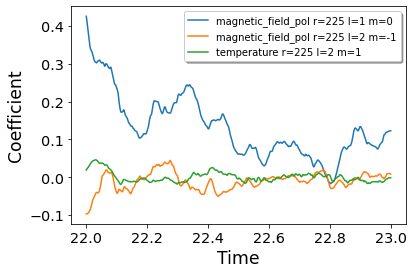

In [10]:
# Plot each component
for icou in range(n_line):
    label1 = " r="+str(radius_id[icou])
    label2 = " l="+str(degree[icou])
    label3 = " m="+str(order[icou])
    label = field_name[icou]+label1+label2+label3

    plt.plot(time, series[icou*n_step:(icou+1)*n_step], label=(label))

# Set graph configurations
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel('Time', fontsize='xx-large')
plt.ylabel('Coefficient', fontsize='xx-large')
legend = plt.legend(loc='upper right', shadow=True, fontsize='medium')

# plt.savefig("picked.pdf")
plt.show()